In [1]:
from sqlalchemy import create_engine,text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
db_user = ""
db_password = ""
db_host = "" 
db_port = ""  
db_name = ""

In [3]:
connection = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection)

In [4]:
query= text("SELECT  DATE(datefrom) AS date, layerid, toid, SUM(datavalue) as datavalue, sum (Ni) as ni, sum (Ns) as ns, sum (Tb) as tb, sum (Tc) as tc, sum (Gm) as gm, sum (Gf) as gf, sum (F1) as f1, sum (F2) as f2, sum (F3) as f3, sum (F4) as f4, sum (F5) as f5, sum (F6) as f6 FROM movements GROUP BY date, layerid, toid ORDER BY date;")
try:
    with engine.connect() as connection:
        chunks = pd.read_sql(query, connection, chunksize=1000) 
        df = pd.concat(chunks, ignore_index=True) 
    print(df)
except Exception as e:
    print(f"Errore durante l'esecuzione della query: {e}")

               date             layerid                toid  datavalue   ni  \
0        2019-08-01  08|033|001|000|000  08|033|004|000|000         57   55   
1        2019-08-01  08|033|001|000|000  08|033|005|000|000         39   39   
2        2019-08-01  08|033|001|000|000  08|033|006|000|000        387  338   
3        2019-08-01  08|033|001|000|000  08|033|007|000|000          9    9   
4        2019-08-01  08|033|001|000|000  08|033|008|000|000         96   82   
...             ...                 ...                 ...        ...  ...   
3496041  2019-09-30  08|099|027|000|000  08|099|023|000|000        216  216   
3496042  2019-09-30  08|099|027|000|000  08|099|024|000|000        200  200   
3496043  2019-09-30  08|099|027|000|000  08|099|025|000|000        264  264   
3496044  2019-09-30  08|099|027|000|000  08|099|026|000|000        120  120   
3496045  2019-09-30  08|099|027|000|000  08|099|999|000|255        241  241   

         ns  tb   tc   gm   gf  f1  f2  f3  f4  f5 

In [5]:
from sklearn.preprocessing import LabelEncoder
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df["weekday"] = df["date"].dt.weekday
df["week"] = df["date"].dt.isocalendar().week - df["date"].dt.isocalendar().week.min()
df['weekend'] = df['weekday'].apply(lambda w: 1  if (w == 5 or w == 6) else 0)
label_encoder = LabelEncoder()
df['layerid'] = label_encoder.fit_transform(df['layerid'])
df['toid'] = label_encoder.fit_transform(df['toid'])
df

,date,layerid,toid,datavalue,ni,ns,tb,tc,gm,gf,f1,f2,f3,f4,f5,f6,weekday,week,weekend
0,2019-08-01,0,3,57,55,2,0,57,37,20,0,1,1,18,18,19,3,0,0
1,2019-08-01,0,4,39,39,0,0,39,26,13,0,0,0,13,13,13,3,0,0
2,2019-08-01,0,5,387,338,49,25,362,210,177,9,42,43,73,88,132,3,0,0
3,2019-08-01,0,6,9,9,0,0,9,6,3,0,0,0,3,3,3,3,0,0
4,2019-08-01,0,7,96,82,14,5,91,53,43,0,13,13,19,19,32,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496041,2019-09-30,465,462,216,216,0,18,198,116,100,3,22,29,45,46,71,0,9,0
3496042,2019-09-30,465,463,200,200,0,16,184,107,93,3,22,27,41,42,65,0,9,0
3496043,2019-09-30,465,464,264,264,0,23,241,144,120,6,29,35,54,55,85,0,9,0
3496044,2019-09-30,465,465,120,120,0,10,110,66,54,0,12,15,27,27,39,0,9,0


In [6]:
df1 = df.groupby(['date', 'layerid','toid'],as_index=False)['datavalue'].sum()
df1 = df1[(df1['layerid'] == 0) & (df1['toid'] == 3)]

Statistiche descrittive sul DataFrame 

In [8]:
df_describe=df.describe()
df_describe

,date,layerid,toid,datavalue,ni,ns,tb,tc,gm,gf,f1,f2,f3,f4,f5,f6,weekday,week,weekend
count,3496046,3.496046e+06,3.496046e+06,3.496046e+06,3.496046e+06,3.496046e+06,3.496046e+06,3.496046e+06,3.496046e+06,3.496046e+06,3.496046e+06,3.496046e+06,3.496046e+06,3.496046e+06,3.496046e+06,3.496046e+06,3.496046e+06,3496046.0,3.496046e+06
mean,2019-08-31 13:32:47.981656832,2.415549e+02,2.422336e+02,9.918166e+01,9.383541e+01,5.346244e+00,1.114572e+01,8.803593e+01,5.551596e+01,4.366569e+01,9.960487e-01,1.030593e+01,1.080521e+01,2.176721e+01,2.244086e+01,3.286639e+01,3.063487e+00,4.35728,2.967192e-01
min,2019-08-01 00:00:00,0.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,2019-08-16 00:00:00,1.460000e+02,1.470000e+02,3.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.0,0.000000e+00
50%,2019-09-01 00:00:00,2.430000e+02,2.450000e+02,1.200000e+01,1.200000e+01,0.000000e+00,0.000000e+00,1.200000e+01,8.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.0,0.000000e+00
75%,2019-09-16 00:00:00,3.390000e+02,3.370000e+02,5.700000e+01,5.500000e+01,1.000000e+00,5.000000e+00,5.300000e+01,3.400000e+01,2.300000e+01,0.000000e+00,4.000000e+00,5.000000e+00,1.500000e+01,1.500000e+01,1.900000e+01,5.000000e+00,7.0,1.000000e+00
max,2019-09-30 00:00:00,4.650000e+02,4.670000e+02,1.968400e+04,1.803500e+04,3.220000e+03,2.860000e+03,1.729400e+04,1.049800e+04,9.377000e+03,5.500000e+02,3.248000e+03,2.716000e+03,4.965000e+03,4.217000e+03,5.665000e+03,6.000000e+00,9.0,1.000000e+00
std,NaN,1.227106e+02,1.218178e+02,3.664392e+02,3.441288e+02,2.865631e+01,4.924731e+01,3.190145e+02,1.988279e+02,1.682399e+02,6.266580e+00,4.474412e+01,4.453963e+01,7.772017e+01,7.956211e+01,1.180153e+02,2.012505e+00,2.53916,4.568118e-01


Grafico che mostra andamento nel tempo di 'datavalue' per il 'layerid' 0 e 'toid' 3

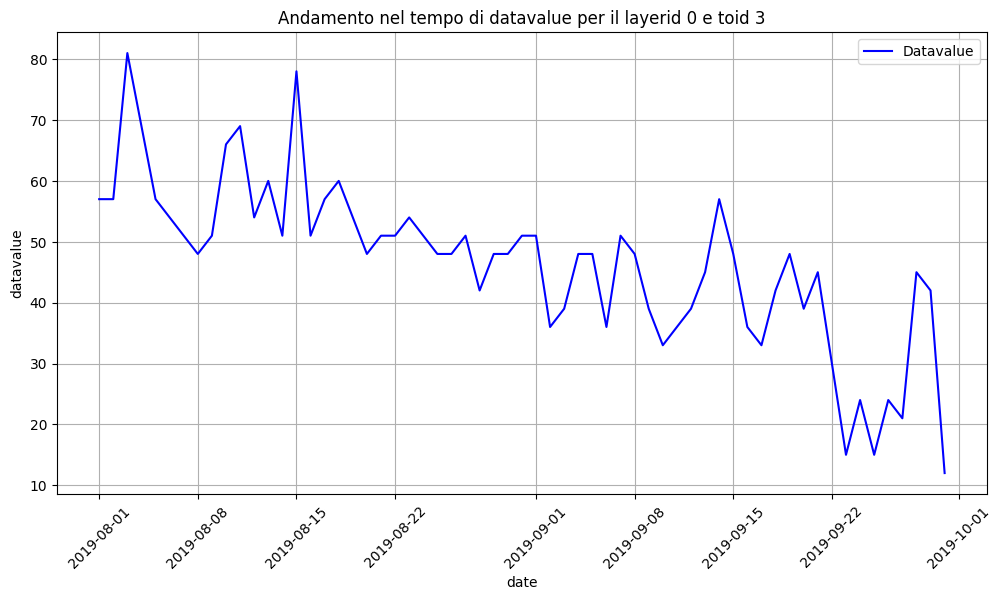

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df1['date'], df1['datavalue'], color='blue', label='Datavalue')
plt.xlabel('date')
plt.ylabel('datavalue')
plt.title('Andamento nel tempo di datavalue per il layerid 0 e toid 3')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Grafico che mostra la distribuzione di 'datavalue'

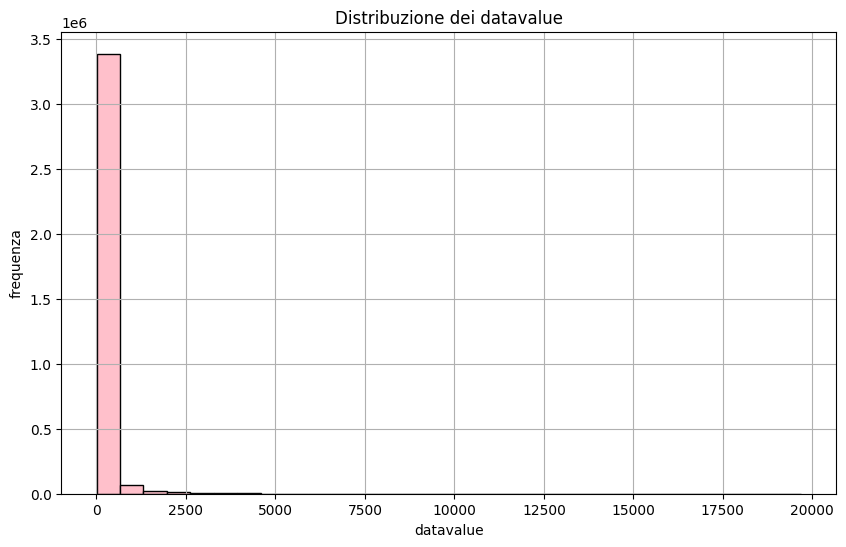

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['datavalue'], bins=30, color='pink', edgecolor='black')
plt.xlabel('datavalue')
plt.ylabel('frequenza')
plt.title('Distribuzione dei datavalue')
plt.grid(True)
plt.show()


La maggior parte dei valori di 'datavalue' è concentrata vicino a zero.
La distribuzione complessiva di 'datavalue' è asimmetrica, con una forte concentrazione di valori piccoli(minori di 2500).

In [14]:
df2 = df.groupby('date',as_index=False)['datavalue'].sum()
df2['weekday'] = pd.to_datetime(df2['date'], format='%Y-%m-%d').dt.weekday
df2

,date,datavalue,weekday
0,2019-08-01,6196481,3
1,2019-08-02,5980888,4
2,2019-08-03,5568629,5
3,2019-08-04,4698935,6
4,2019-08-05,5621312,0
...,...,...,...
56,2019-09-26,6688862,3
57,2019-09-27,6556703,4
58,2019-09-28,6339631,5
59,2019-09-29,5380908,6


Violin plot: Distribuzione di datavalue per giorno della settimana

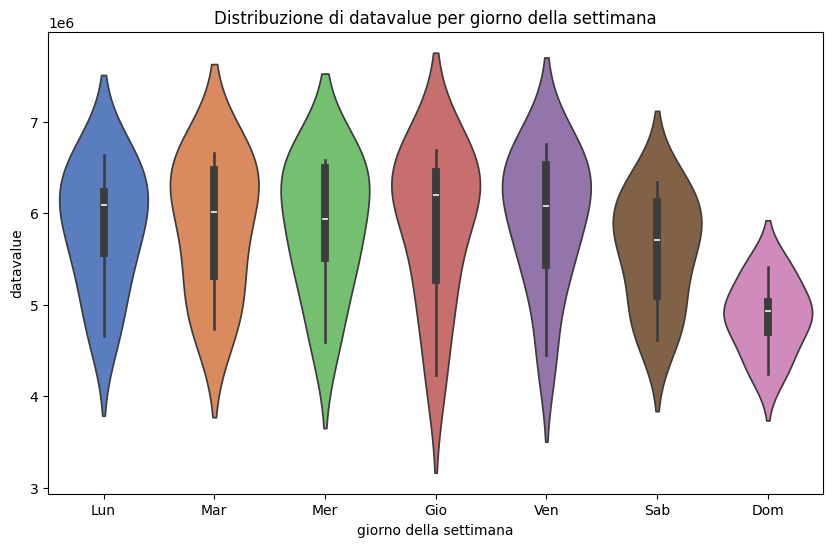

In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='weekday', y='datavalue', hue='weekday', data=df2, palette='muted', legend = False)
plt.xlabel('giorno della settimana')
plt.ylabel('datavalue')
plt.title('Distribuzione di datavalue per giorno della settimana')
plt.xticks(ticks=np.arange(7), labels=['Lun', 'Mar', 'Mer', 'Gio', 'Ven', 'Sab', 'Dom'])
plt.show()

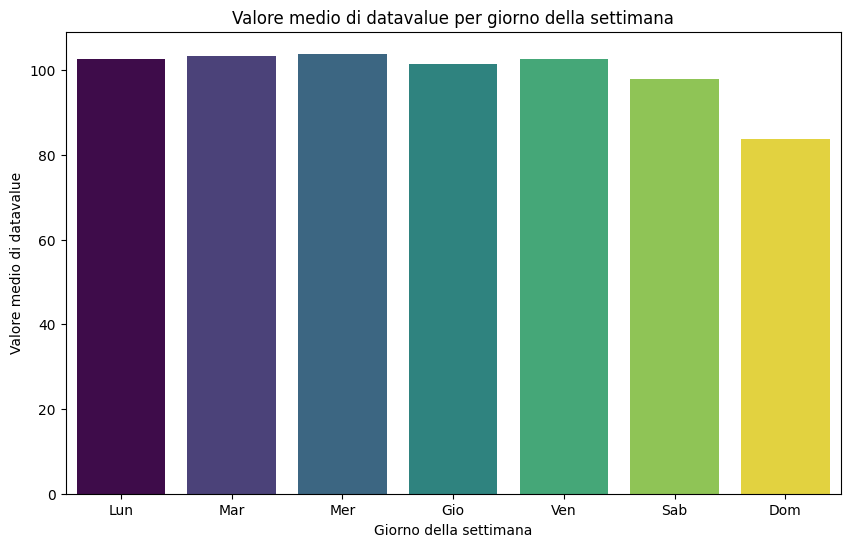

In [38]:
weekday_avg = df.groupby('weekday')['datavalue'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='datavalue', hue = 'weekday', data=weekday_avg, palette='viridis', legend = False)
plt.xlabel('Giorno della settimana')
plt.ylabel('Valore medio di datavalue')
plt.title('Valore medio di datavalue per giorno della settimana')
plt.xticks(ticks=np.arange(7), labels=['Lun', 'Mar', 'Mer', 'Gio', 'Ven', 'Sab', 'Dom'])
plt.show()

Matrice di correlazione per tutte le colonne numeriche in df

In [19]:
cormat = df.corr()
round(cormat,2)

,date,layerid,toid,datavalue,ni,ns,tb,tc,gm,gf,f1,f2,f3,f4,f5,f6,weekday,week,weekend
date,1.00,-0.00,-0.01,0.01,0.02,-0.10,0.02,0.01,0.01,0.01,0.02,0.02,0.02,0.01,0.01,0.01,-0.01,0.99,0.03
layerid,-0.00,1.00,0.61,0.03,0.03,0.04,0.01,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.00,-0.00,0.01
toid,-0.01,0.61,1.00,0.03,0.03,0.05,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.00,-0.01,0.00
datavalue,0.01,0.03,0.03,1.00,1.00,0.79,0.97,1.00,1.00,1.00,0.93,0.97,0.99,0.99,1.00,0.99,-0.01,0.02,-0.01
ni,0.02,0.03,0.03,1.00,1.00,0.76,0.97,1.00,1.00,1.00,0.93,0.97,0.99,0.99,1.00,0.99,-0.01,0.02,-0.02
ns,-0.10,0.04,0.05,0.79,0.76,1.00,0.76,0.79,0.79,0.80,0.73,0.78,0.80,0.80,0.79,0.77,-0.00,-0.10,-0.01
tb,0.02,0.01,0.02,0.97,0.97,0.76,1.00,0.96,0.97,0.96,0.89,0.96,0.97,0.96,0.97,0.94,-0.02,0.02,-0.03
tc,0.01,0.03,0.03,1.00,1.00,0.79,0.96,1.00,1.00,1.00,0.93,0.96,0.99,0.99,1.00,0.99,-0.01,0.01,-0.01
gm,0.01,0.03,0.03,1.00,1.00,0.79,0.97,1.00,1.00,0.99,0.92,0.96,0.99,0.99,1.00,0.99,-0.01,0.02,-0.02
gf,0.01,0.03,0.03,1.00,1.00,0.80,0.96,1.00,0.99,1.00,0.93,0.97,0.98,0.99,1.00,0.99,-0.01,0.02,-0.01


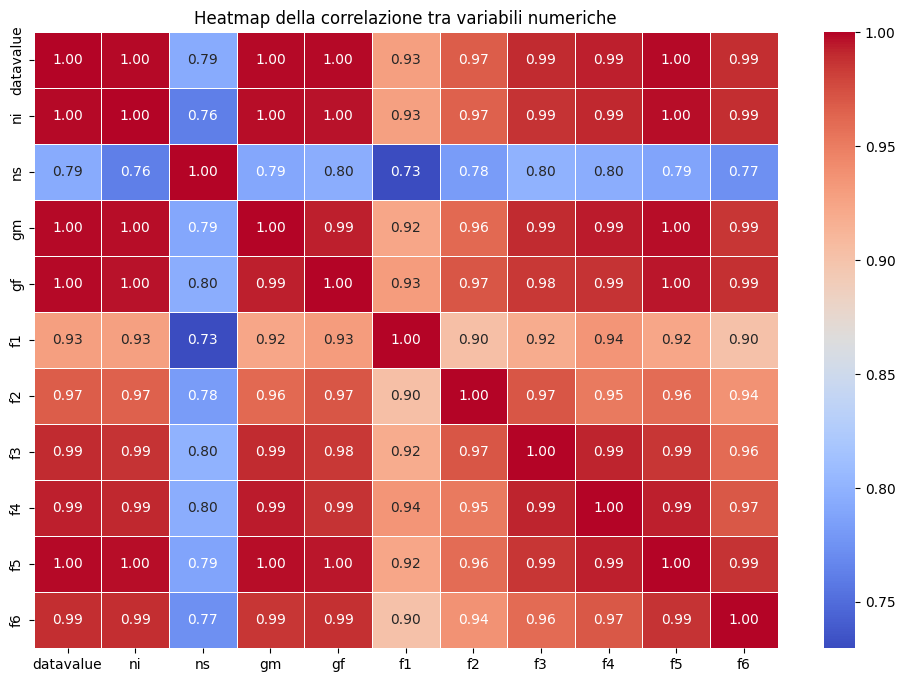

In [20]:
corr_matrix = df[['datavalue', 'ni', 'ns', 'gm', 'gf', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap della correlazione tra variabili numeriche')
plt.show()

Osservando la matrice, notiamo che le variabili 'layerid' e 'toid', che rappresentano rispettivamente la regione di partenza e quella di destinazione, non mostrano alcuna correlazione significativa con le altre variabili, suggerendo che la provenienza e la destinazione degli spostamenti non incidono direttamente sui valori registrati nelle altre colonne.
Al contrario, 'datavalue' presenta una fortissima correlazione (quasi 1.00) con molte variabili(ni, tc, gm, gf, f1, f2, f3,f4,f5,f6). 
Ce lo aspettavamo perchè datavalue è calcolato come somma di: gm e gf, ni e ns, tb e tc, e dalla somma delle età delle persone che compiono un determinato spostamento. Di conseguenza, l'elevata correlazione riflette la struttura stessa dei dati.